In [2]:
!head -n 10 yob1880.txt

In [50]:
import pandas as pd
%matplotlib inline
import numpy as np

In [4]:
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [5]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [6]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110490
Name: births, dtype: int64

In [38]:
years = range(1880, 2015)

In [39]:
pieces = []
columns = ['name', 'sex', 'births']

In [40]:
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [42]:
names = pd.concat(pieces, ignore_index=True)

In [43]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [44]:
total_births = names.pivot_table('births', 'year', 'sex', aggfunc=sum)

In [45]:
total_births.tail()

sex,F,M
year,,
2010,1773440,1914629
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876


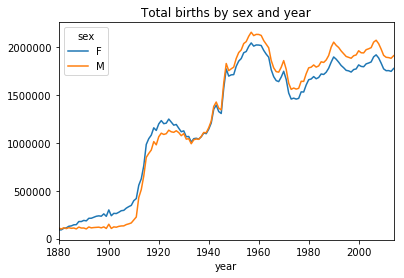

In [46]:
total_births.plot(title='Total births by sex and year')

In [47]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [48]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [51]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [52]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

In [53]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

/Users/tlking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [54]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

/Users/tlking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [55]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [56]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [57]:
total_births = top1000.pivot_table('births', 'year', 'name', aggfunc=sum)

In [58]:
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [59]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1131eb890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bcbe250>], dtype=object)

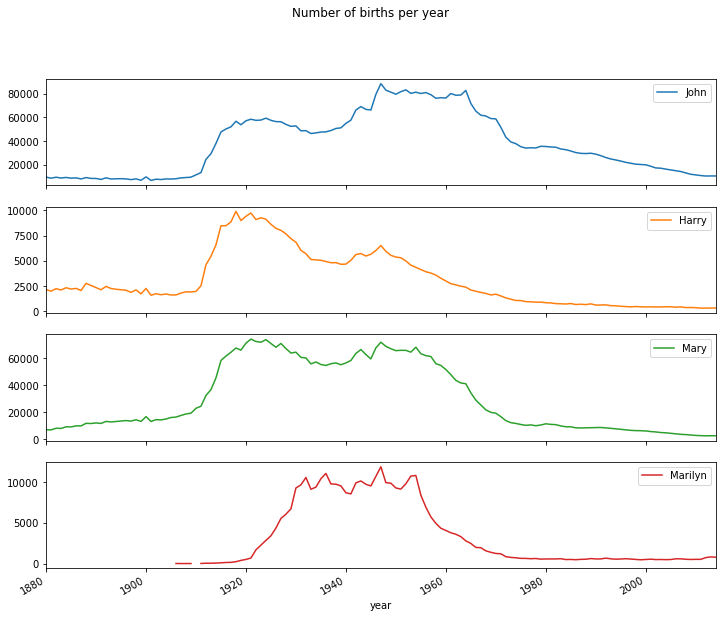

In [60]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [61]:
table = top1000.pivot_table('prop', 'year', 'sex', aggfunc=sum)

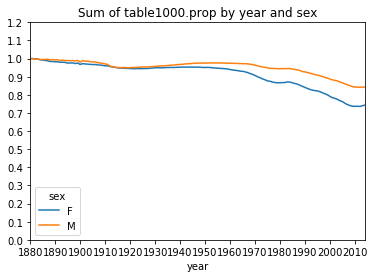

In [62]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [97]:
df = boys[boys.year == 2010]

In [98]:
df

,name,sex,births,year,prop
260877,Jacob,M,22095,2010,0.011540
260878,Ethan,M,17993,2010,0.009398
260879,Michael,M,17324,2010,0.009048
260880,Jayden,M,17158,2010,0.008962
260881,William,M,17036,2010,0.008898
260882,Alexander,M,16746,2010,0.008746
260883,Noah,M,16438,2010,0.008585
260884,Daniel,M,15819,2010,0.008262
260885,Aiden,M,15520,2010,0.008106
260886,Anthony,M,15475,2010,0.008083


In [99]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

/Users/tlking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [66]:
prop_cumsum[:10]

260877    0.011540
260878    0.020938
260879    0.029986
260880    0.038947
260881    0.047845
260882    0.056592
260883    0.065177
260884    0.073439
260885    0.081545
260886    0.089628
Name: prop, dtype: float64

In [100]:
prop_cumsum.searchsorted(0.5)

array([116])

In [101]:
df = boys[boys.year == 1900]

In [102]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()

/Users/tlking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [103]:
in1900.searchsorted(0.5) + 1

array([25])

In [104]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

/Users/tlking/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [105]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [108]:
diversity=diversity.astype(float)

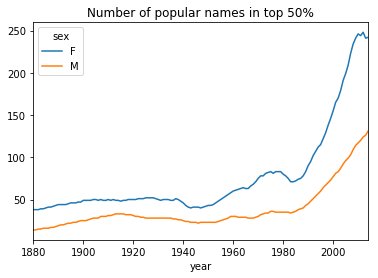

In [109]:
diversity.plot(title="Number of popular names in top 50%")

In [87]:
all_names = top1000.name.unique()

In [88]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [89]:
lesley_like = all_names[mask]

In [90]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [91]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [92]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    375158
Lesly      11431
Name: births, dtype: int64

In [93]:
table = filtered.pivot_table('births', 'year', 'sex', aggfunc='sum')

In [94]:
table = table.div(table.sum(1), axis=0)

In [95]:
table.tail()

sex,F,M
year,,
2010,1.0,NaN
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN


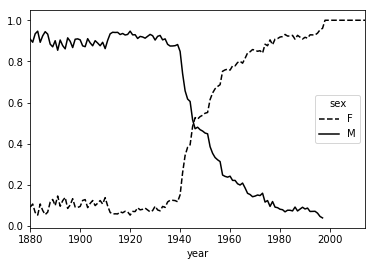

In [96]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [110]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [111]:
table = names.pivot_table('births', last_letters, ['sex', 'year'], aggfunc=sum)

In [112]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [113]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                 NaN     694.0     454.0    411.0    3912.0   39229.0
c                 5.0      49.0     954.0    482.0   15463.0   23325.0
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0

In [114]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022121.0
     2010    1773440.0
M    1910     194216.0
     1960    2132756.0
     2010    1914629.0
dtype: float64

In [115]:
import matplotlib.pyplot as plt

In [117]:
letter_prop = subtable / subtable.sum().astype(float)

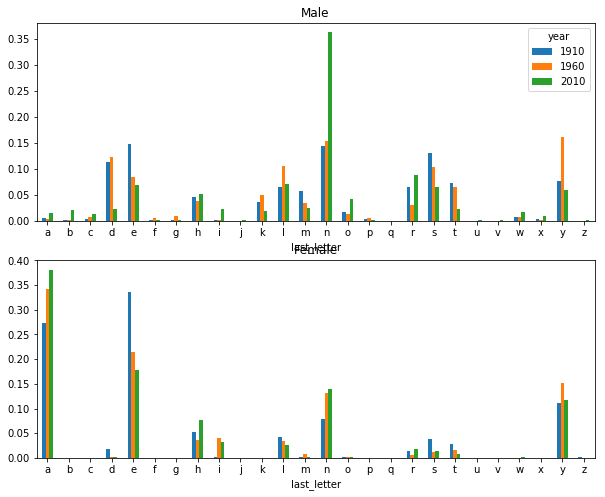

In [118]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [119]:
letter_prop = table / table.sum().astype(float)

In [120]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [121]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


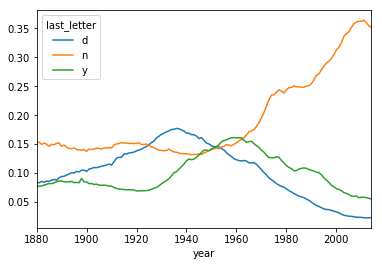

In [122]:
dny_ts.plot()